# Previsão de cancelamentos em Hotéis

### Sumário - Modelagem e previsão dos Dados

a) Importação das bibliotecas

b) Lendo os arquivos

c) Modelos

d) Seleção de Features

e) Previsões (Treino e Teste)

f) Salvando o modelo

---

#### a) Importação das bibliotecas

In [52]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

sys.path.insert(0, '../') # set home directory
from src.funcs import *

import warnings
warnings.filterwarnings("ignore")

#### b) Lendo os arquivos

In [12]:
df_clean = pd.read_csv('../data/intermediate/bc_data_clean.csv')
df_norm = pd.read_csv('../data/intermediate/bc_data_norm.csv')

#### c) Modelos

Será realizado um teste rápido com diversos modelos de classificação com o intuito de tentar localizar o modelo que queremos utilizar e melhorar. Os modelos que serão testados são os seguintes:

- Regressão Logística: <br/>
É um modelo linear para classificação binária. Ele utiliza a função logística para modelar a probabilidade de uma instância pertencer a uma classe.

- K-Nearest Neighbors (KNN): <br/>
Classifica uma instância baseada na maioria das classes das k instâncias mais próximas, onde a proximidade é medida por uma métrica de distância.

- Decision Tree Classifier: <br/>
Usa uma árvore de decisão para modelar decisões com base nas características dos dados.

- Random Forest Classifier: <br/>
É uma coleção de árvores de decisão que votam para determinar a classe final.

- Naive Bayes: <br/>
Usa o teorema de Bayes para calcular a probabilidade de uma instância pertencer a uma classe com base nas probabilidades condicionais das características.

- Gradient Boosting Classifier: <br/>
Combina várias árvores de decisão fracas para criar um modelo forte.

##### Base não Normalizada

LogisticRegression()
----------------------------------------------------------------------------------------------------


Acurácia: 0.7951670994220621


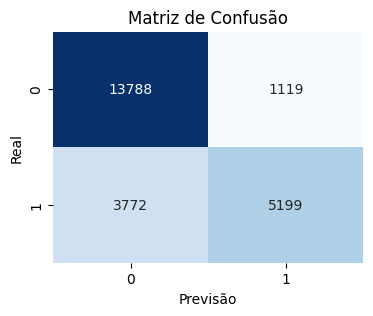

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14907
           1       0.82      0.58      0.68      8971

    accuracy                           0.80     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.80      0.79     23878

KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.8389731133260742


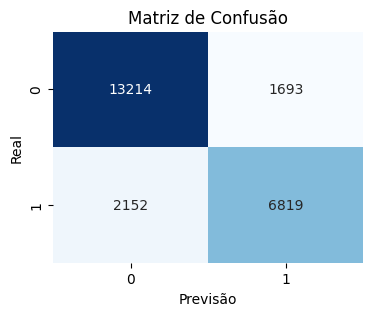

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14907
           1       0.80      0.76      0.78      8971

    accuracy                           0.84     23878
   macro avg       0.83      0.82      0.83     23878
weighted avg       0.84      0.84      0.84     23878

DecisionTreeClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.848940447273641


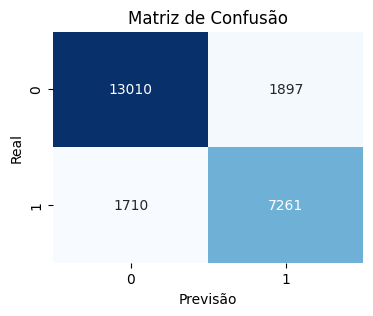

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     14907
           1       0.79      0.81      0.80      8971

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878

RandomForestClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.891196917664796


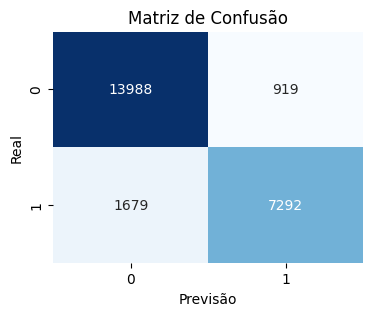

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     14907
           1       0.89      0.81      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

GaussianNB()
----------------------------------------------------------------------------------------------------
Acurácia: 0.4734483625094229


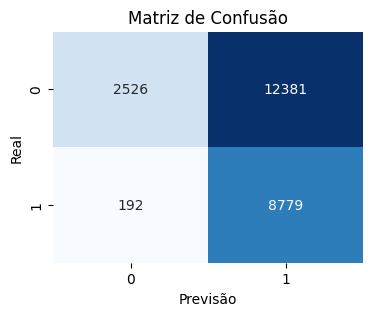

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.17      0.29     14907
           1       0.41      0.98      0.58      8971

    accuracy                           0.47     23878
   macro avg       0.67      0.57      0.43     23878
weighted avg       0.74      0.47      0.40     23878

GradientBoostingClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.8427003936678114


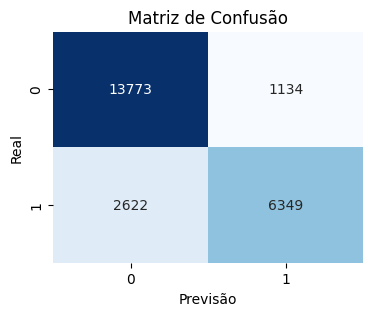

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     14907
           1       0.85      0.71      0.77      8971

    accuracy                           0.84     23878
   macro avg       0.84      0.82      0.83     23878
weighted avg       0.84      0.84      0.84     23878



In [13]:
lista_modelos = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    GradientBoostingClassifier()
    ]

df_aux = df_clean.copy()
encoded = LabelEncoder().fit_transform(df_aux['date'].astype(str))
df_aux['date'] = encoded
df_aux['date'] = df_aux['date'].values.astype('int64')

for modelo in lista_modelos:
    print(modelo)
    print('-'*100)
    X = df_aux.drop(['cancellation'], axis=1)
    y = df_aux['cancellation']

    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Padronizando os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Criando e treinando o modelo SVM
    modelo.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    previsoes = modelo.predict(X_test)

    # Avaliando o desempenho do modelo
    acuracia = accuracy_score(y_test, previsoes)
    matriz_confusao = confusion_matrix(y_test, previsoes)
    relatorio_classificacao = classification_report(y_test, previsoes)

    # Exibindo métricas de avaliação
    print(f'Acurácia: {acuracia}')
    plt.figure(figsize=(4, 3))
    sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    print(f'Relatório de Classificação:\n{relatorio_classificacao}')
    print('='*100)

##### Base Normalizada

LogisticRegression()
----------------------------------------------------------------------------------------------------


Acurácia: 0.7951670994220621


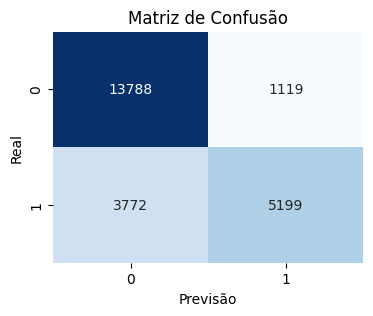

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14907
           1       0.82      0.58      0.68      8971

    accuracy                           0.80     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.80      0.79     23878

KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.8389731133260742


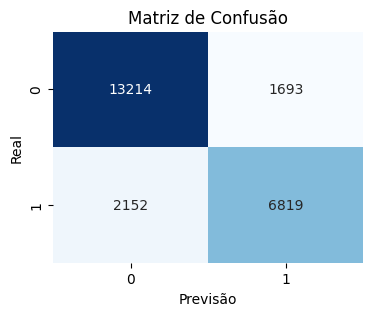

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14907
           1       0.80      0.76      0.78      8971

    accuracy                           0.84     23878
   macro avg       0.83      0.82      0.83     23878
weighted avg       0.84      0.84      0.84     23878

DecisionTreeClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.8499874361336796


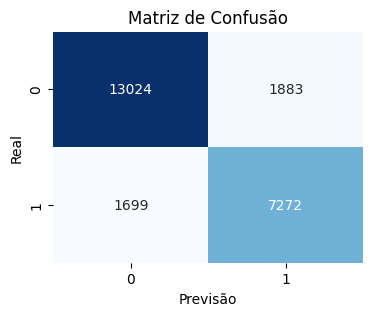

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     14907
           1       0.79      0.81      0.80      8971

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878

RandomForestClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.8911550381103945


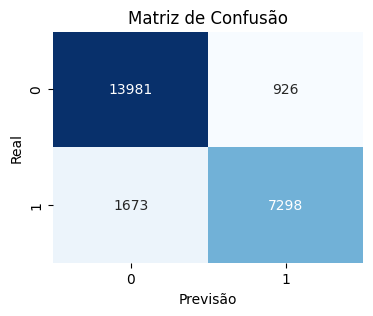

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14907
           1       0.89      0.81      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

GaussianNB()
----------------------------------------------------------------------------------------------------
Acurácia: 0.4734483625094229


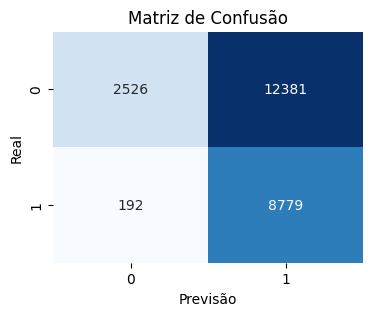

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.17      0.29     14907
           1       0.41      0.98      0.58      8971

    accuracy                           0.47     23878
   macro avg       0.67      0.57      0.43     23878
weighted avg       0.74      0.47      0.40     23878

GradientBoostingClassifier()
----------------------------------------------------------------------------------------------------
Acurácia: 0.8427003936678114


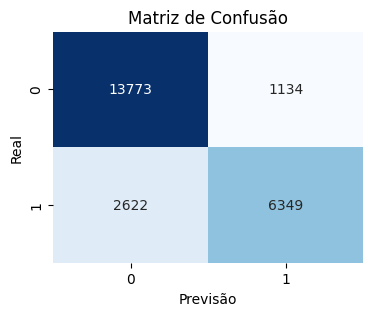

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     14907
           1       0.85      0.71      0.77      8971

    accuracy                           0.84     23878
   macro avg       0.84      0.82      0.83     23878
weighted avg       0.84      0.84      0.84     23878



In [14]:
df_aux_norm = df_norm.copy()
encoded = LabelEncoder().fit_transform(df_aux_norm['date'].astype(str))
df_aux_norm['date'] = encoded
df_aux_norm['date'] = df_aux_norm['date'].values.astype('int64')

for modelo in lista_modelos:
    print(modelo)
    print('-'*100)
    X = df_aux_norm.drop(['cancellation'], axis=1)
    y = df_aux_norm['cancellation']

    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Padronizando os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Criando e treinando o modelo SVM
    modelo.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    previsoes = modelo.predict(X_test)

    # Avaliando o desempenho do modelo
    acuracia = accuracy_score(y_test, previsoes)
    matriz_confusao = confusion_matrix(y_test, previsoes)
    relatorio_classificacao = classification_report(y_test, previsoes)

    # Exibindo métricas de avaliação
    print(f'Acurácia: {acuracia}')
    plt.figure(figsize=(4, 3))
    sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    print(f'Relatório de Classificação:\n{relatorio_classificacao}')
    print('='*100)

Considerações: Pelas métricas obtidas, vou seguir com o modelo "RandomForestClassifier" que obteve bons resultados sendo o modelo com maior acurácia com ambas as bases, tendo um f1-score levemente melhor na base não normalizada, devido à isso, seguiremos com essa combinação.

#### d) Seleção de Features

In [17]:
X = df_aux.drop('cancellation', axis=1)
y = df_aux['cancellation']

info_mutua = mutual_info_classif(X, y)

df_info_mutua = pd.DataFrame({'Variável': X.columns, 'Grau de Dependência': info_mutua})
df_info_mutua = df_info_mutua.sort_values(by='Grau de Dependência', ascending=False)
df_info_mutua

,Variável,Grau de Dependência
17,deposit_policy,0.131006
1,days_between_booking_arrival,0.084499
19,avg_price,0.078898
9,country,0.069518
13,num_previous_cancellations,0.043032
10,market_segment,0.042337
21,total_of_special_requests,0.040114
22,date,0.034832
20,required_car_parking_spaces,0.030472
11,distribution_channel,0.028738


Considerações: A tabela acima mostra pela coluna "Grau de Dependência" o quanto que as variáveis tem de dependência em relação à variável alvo ("cancellation"), e de acordo com ela, podemos perceber que nenhuma variável acaba não tendo relação nenhuma com a nossa variável alvo ("num_children"), por outro lado, vemos que nenhuma tem tanta relação assim também. Com isso, não tem a necessidade de eliminar nenhuma variável do nosso dataset.

#### e) Previsões (Treino e Teste)

Antes de começarmos, iremos separar a base não normalizada para treino e teste de duas formas:
- Separando os dados de treino e teste de forma aleatória
- Separando os dados de treino com os anos de 2015 e 2016 e de teste com o ano de 2017
##### Treino (Aleatório)

In [48]:
modelo = RandomForestClassifier(random_state=42)
X = df_aux.drop(['cancellation'], axis=1)
y = df_aux['cancellation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
score = cross_val_score(modelo, X_train, y_train, cv=3, n_jobs=-1).mean()

print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Pontuação:", grid_search.best_score_)
print("Média Acurácia das Validações Cruzadas:", score)

Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor Pontuação: 0.8796486309506554
Média Acurácia das Validações Cruzadas: 0.8788319825993168


##### Teste (Aleatório)

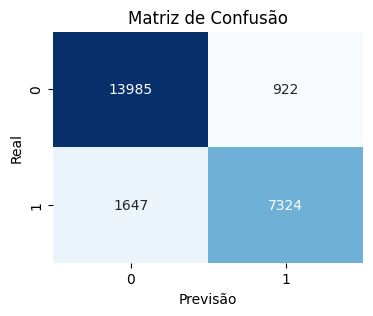

Report: 
               precision    recall  f1-score   support

      booked       0.89      0.94      0.92     14907
cancellation       0.89      0.82      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

Accuracy: 0.892
Precision: 0.888
Recall: 0.816
F1 score: 0.851


In [49]:
modelo_final_aleat = RandomForestClassifier(**grid_search.best_params_)
modelo_final_aleat.fit(X_train, y_train)

y_pred = modelo_final_aleat.predict(X_test)

# Métricas
matriz_confusao = confusion_matrix(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)

# Exibindo métricas de avaliação
plt.figure(figsize=(4, 3))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print('Report: \n', classification_report(y_test, y_pred, labels=[0,1], target_names=['booked','cancellation']))
print('Accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
print('Precision: %.3f' % (precision_score(y_test, y_pred)))
print('Recall: %.3f' % (recall_score(y_test, y_pred)))
print('F1 score: %.3f' % (f1_score(y_test, y_pred)))

##### Treino (2015, 2016)

In [50]:
df_aux_train = df_clean[df_clean.date <= "2016-12-31"]
df_aux_train_norm = df_aux_train.copy()
encoded = LabelEncoder().fit_transform(df_aux_train_norm['date'].astype(str))
df_aux_train_norm['date'] = encoded
df_aux_train_norm['date'] = df_aux_train_norm['date'].values.astype('int64')
X_train = df_aux_train_norm.drop(['cancellation'], axis=1)
y_train = df_aux_train_norm['cancellation']

df_aux_test = df_clean[df_clean.date > "2016-12-31"]
df_aux_test_norm = df_aux_test.copy()
encoded = LabelEncoder().fit_transform(df_aux_test_norm['date'].astype(str))
df_aux_test_norm['date'] = encoded
df_aux_test_norm['date'] = df_aux_test_norm['date'].values.astype('int64')
X_test = df_aux_test_norm.drop(['cancellation'], axis=1)
y_test = df_aux_test_norm['cancellation']

modelo = RandomForestClassifier(random_state=42)

parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
score = cross_val_score(modelo, X_train, y_train, cv=3, n_jobs=-1).mean()

print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Pontuação:", grid_search.best_score_)
print("Média Acurácia das Validações Cruzadas:", score)

Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Melhor Pontuação: 0.6408129612123853
Média Acurácia das Validações Cruzadas: 0.5926822670188977


##### Teste (2017)

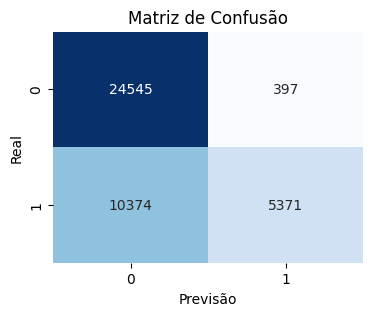

Report: 
               precision    recall  f1-score   support

      booked       0.70      0.98      0.82     24942
cancellation       0.93      0.34      0.50     15745

    accuracy                           0.74     40687
   macro avg       0.82      0.66      0.66     40687
weighted avg       0.79      0.74      0.70     40687

Accuracy: 0.735
Precision: 0.931
Recall: 0.341
F1 score: 0.499


In [51]:
modelo_final = RandomForestClassifier(**grid_search.best_params_)
modelo_final.fit(X_train, y_train)

y_pred = modelo_final.predict(X_test)

# Métricas
matriz_confusao = confusion_matrix(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)

# Exibindo métricas de avaliação
plt.figure(figsize=(4, 3))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print('Report: \n', classification_report(y_test, y_pred, labels=[0,1], target_names=['booked','cancellation']))
print('Accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
print('Precision: %.3f' % (precision_score(y_test, y_pred)))
print('Recall: %.3f' % (recall_score(y_test, y_pred)))
print('F1 score: %.3f' % (f1_score(y_test, y_pred)))

#### f) Salvando o modelo

In [57]:
caminho_modelo = '../models/random_forrest_v1.pkl'

# Salvar o modelo usando pickle
with open(caminho_modelo, 'wb') as arquivo_modelo:
    pickle.dump(modelo, arquivo_modelo)

# Resumo do Case

#### Elabore hipóteses e visualizações envolvendo a variável cancellation e, pelo menos, outras duas variáveis presentes no dataset;

As visualizações (gráficos e tabelas) foram criadas a partir da análise exploratória no 1º notebook. As hipóteses levantadas a partir dessas visualizações são as seguintes:
- Com base no 1º gráfico comparando a quantidade total de clientes, clientes que cancelaram e clientes recorrentes é notável a influência da variável de data na quantidade de reservas, sendo essa variável totalmente proporcional à quantidade de cancelamentos. Por outro lado, a variável de clientes recorrentes acaba sendo inversamente proporcional ao compara-lá com a nossa variável "Alvo". Uma hipótese seria de que quanto mais fidelizado o cliente estiver, menos cancelamentos irão ocorrer naturalmente. 
- Já nos gráficos/tabelas de taxa de cancelamento por variável surgiram tres insights, o primeiro que clientes que alugam quartos mais chiques não cancelam tão facilmente ao comparar com reservas de quartos mais simples, uma hipótese seria de que se o investimento em cima desses quartos mais simples aumentasse, a taxa de cancelamento também abaixaria? Já o 2º insight, seria a excelente qualidade do serviço prestado, já que clientes recorrentes possuem uma taxa de cancelamento muito baixa, e o 3º insight acaba voltando novamente para o ponto de fidelização do cliente, ao comparar as taxas de cancelamento de clientes que nunca se hospedaram com clientes que já se hospedaram, vemos uma diferença gritante. Talvez com ações de marketing voltadas para esses clientes novos, para fazer com que se hospedem pela 1ª vez já seja o suficiente para aumentar a receita e diminuir as taxas de cancelamento.

#### Desenvolva um modelo preditivo de classificação para identificar cancelamentos e utilize métricas adequadas para argumentar a efetividade do modelo;

Foram testados ao todo, 6 algoritmos de classificação, e entre eles o "RandomForest" se destacou positivamente tendo a maior acurácia, precisão, revocação e f1-score em ambas as bases(normalizada e não normalizada) além de ter visualmente a matriz de confusão para dar uma visão mais resumida e compacta da efetividade do modelo. Com isso, optamos por utilizar esse algoritmo para as predições, e vale lembrar que todas essas métricas impõe o seguinte:
- Acurácia: Proporção de predições corretas em relação ao total de predições
- Precisão: Mede a proporção de exemplos identificados como positivos que eram realmente positivos
- Revocação: Mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo
- F1-Score: Média harmônica entre precisão e revocação. Ele fornece um equilíbrio entre as duas métricas

#### Ao realizar a validação cruzada do modelo de classificação, discuta sobre as diferenças entre utilizar uma separação entre treino e teste aleatória e uma separação temporal (Ex: treino em 2015 e 2016 e validação em 2017). Os resultados são diferentes? Qual o mais indicado?

Houve uma diferença muito grande entre essas duas separações de dados, onde a separação aleatória acabou obtendo resultados muito mais positivos. A primeira explicação para esse resultado é devido à % de dados utilizados de teste nas duas separações, na separação aleatória, 20% dos dados foram utilizados para teste, já na outra separação foram utilizados cerca de 34% dos dados para teste. Nesse caso, o mais indicado seria separar os dados de forma aleatória para a realização das previsões. 